<a href="https://colab.research.google.com/github/11239A086/DATA_SCIENCE_E-RECORD_86/blob/main/11239A086_Exercise_2_DSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()  # This will open a dialog to upload your file


Saving fruits.csv to fruits (1).csv


Fruits sorted by weight:
          Fruit   Color  Weight  Sweetness
0    Cranberry     Red       2          3
5    Blueberry    Blue       2          7
7   Strawberry     Red      15          8
2     Tamarind   Brown      16          4
10      Grapes  Purple      50          9
1        Lemon  Yellow      80          3
8       Banana  Yellow     120          8
6        Apple     Red     150          7
3       Orange  Orange     160          6
11       Mango  Orange     200          9
4    Pineapple   Brown     900          6
9   Watermelon   Green    5000          8
Fruits sorted by sweetness:
          Fruit   Color  Weight  Sweetness
10      Grapes  Purple      50          9
11       Mango  Orange     200          9
7   Strawberry     Red      15          8
8       Banana  Yellow     120          8
9   Watermelon   Green    5000          8
5    Blueberry    Blue       2          7
6        Apple     Red     150          7
3       Orange  Orange     160          6
4    Pineapple   Brow

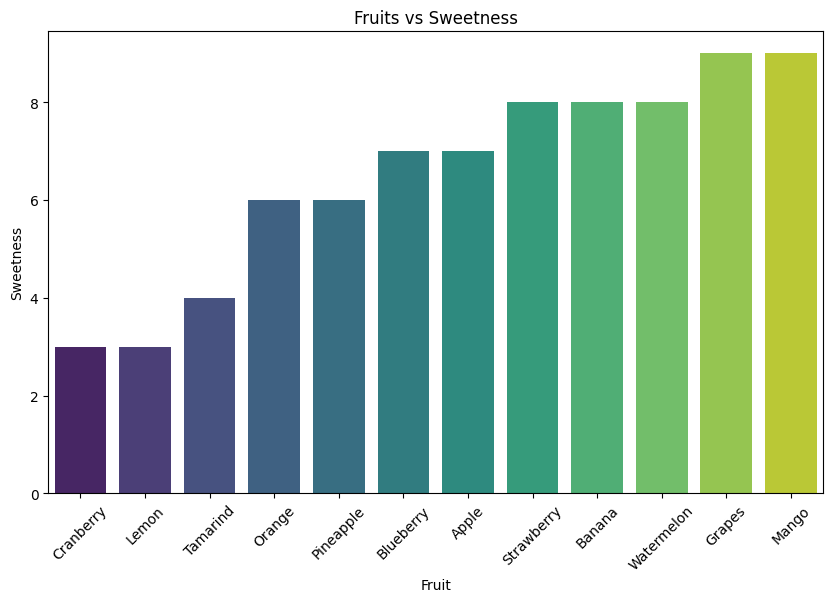

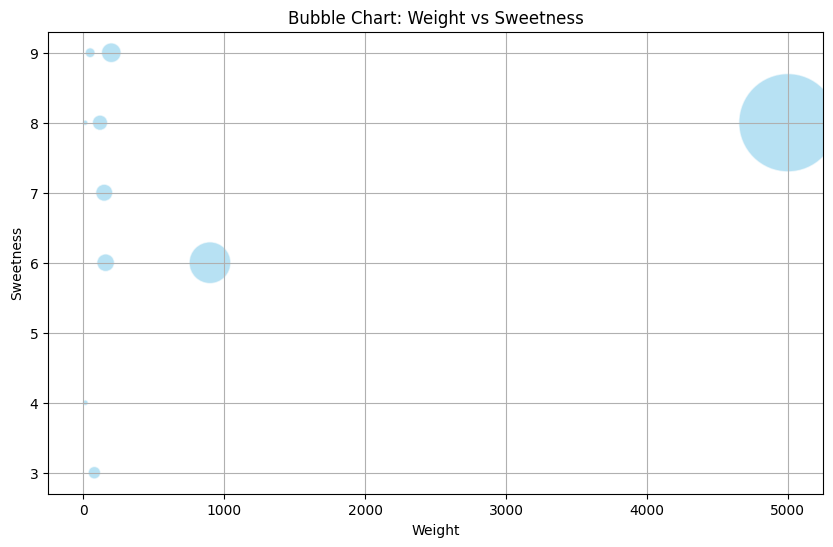

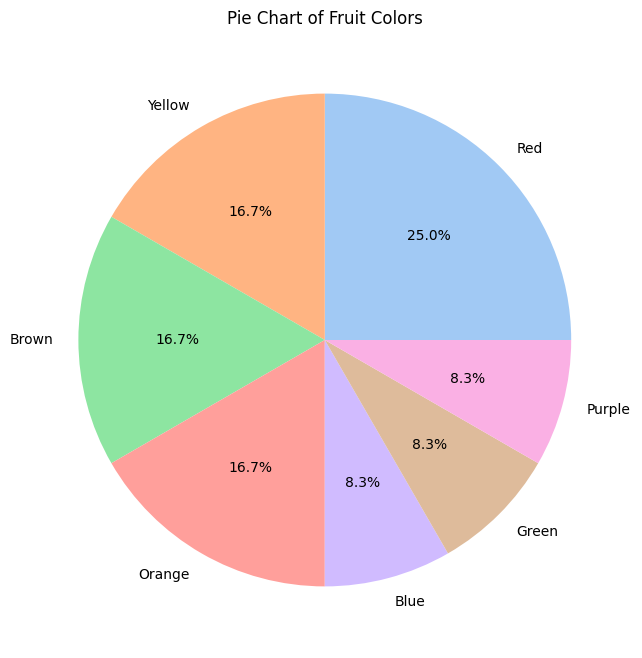

Sweetest fruit(s):
      Fruit   Color  Weight  Sweetness  Sweetness-to-Weight Ratio
10  Grapes  Purple      50          9                      0.180
11   Mango  Orange     200          9                      0.045
Heaviest fruit(s):
         Fruit  Color  Weight  Sweetness  Sweetness-to-Weight Ratio
9  Watermelon  Green    5000          8                     0.0016
Fruits with weight < 100 and sweetness < 6:
        Fruit   Color  Weight  Sweetness  Sweetness-to-Weight Ratio
0  Cranberry     Red       2          3                     1.5000
1      Lemon  Yellow      80          3                     0.0375
2   Tamarind   Brown      16          4                     0.2500
Average sweetness by fruit color:
 Color
Blue      7.0
Brown     5.0
Green     8.0
Orange    7.5
Purple    9.0
Red       6.0
Yellow    5.5
Name: Sweetness, dtype: float64


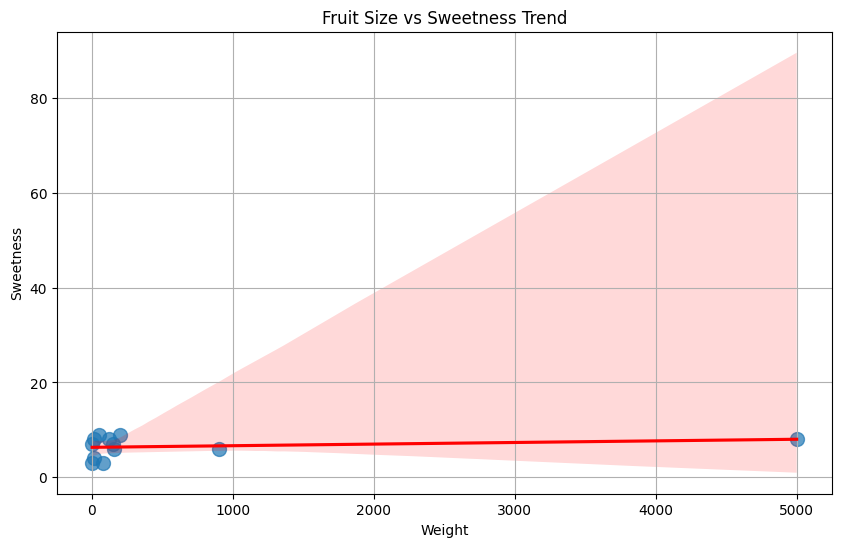

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Fruits dataset
fruits_df = pd.read_csv("fruits.csv")

# 1. Ranking & Sorting
# Sort fruits by weight (lightest to heaviest)
sorted_by_weight = fruits_df.sort_values(by="Weight")
print("Fruits sorted by weight:\n", sorted_by_weight)

# Sort by sweetness
sorted_by_sweetness = fruits_df.sort_values(by="Sweetness", ascending=False)
print("Fruits sorted by sweetness:\n", sorted_by_sweetness)

# 2. Statistical Analysis
# Average weight and sweetness
average_weight = fruits_df["Weight"].mean()
average_sweetness = fruits_df["Sweetness"].mean()
print(f"Average Weight: {average_weight}")
print(f"Average Sweetness: {average_sweetness}")

# Sweetness-to-weight ratio
fruits_df["Sweetness-to-Weight Ratio"] = fruits_df["Sweetness"] / fruits_df["Weight"]
print("Sweetness-to-Weight Ratio:\n", fruits_df[["Fruit", "Sweetness-to-Weight Ratio"]])

# Mode of fruit colors
color_mode = fruits_df["Color"].mode()[0]
print(f"Most common fruit color: {color_mode}")

# 3. Color-based Grouping
# Group fruits by color
color_groups = fruits_df.groupby("Color").size()
print("Fruits grouped by color:\n", color_groups)

# Which color category has the sweetest fruits?
sweetest_color = fruits_df.groupby("Color")["Sweetness"].mean().idxmax()
print(f"Sweetest color category: {sweetest_color}")

# 4. Visualizations
# Bar chart: Fruits vs Sweetness
plt.figure(figsize=(10, 6))
sns.barplot(x="Fruit", y="Sweetness", data=fruits_df, hue="Fruit", palette="viridis", legend=False)
plt.title("Fruits vs Sweetness")
plt.xticks(rotation=45)
plt.show()

# Bubble chart: Weight vs Sweetness
plt.figure(figsize=(10, 6))
plt.scatter(fruits_df["Weight"], fruits_df["Sweetness"], s=fruits_df["Weight"], alpha=0.6, c="skyblue", edgecolors="w")
plt.title("Bubble Chart: Weight vs Sweetness")
plt.xlabel("Weight")
plt.ylabel("Sweetness")
plt.grid(True)
plt.show()

# Pie chart of fruit colors
color_counts = fruits_df["Color"].value_counts()
color_counts.plot.pie(autopct="%1.1f%%", figsize=(8, 8), colors=sns.color_palette("pastel"), title="Pie Chart of Fruit Colors")
plt.ylabel("")
plt.show()

# 5. Custom Insights
# Find the sweetest fruit(s)
sweetest_fruit = fruits_df[fruits_df["Sweetness"] == fruits_df["Sweetness"].max()]
print("Sweetest fruit(s):\n", sweetest_fruit)

# Find the heaviest fruit(s)
heaviest_fruit = fruits_df[fruits_df["Weight"] == fruits_df["Weight"].max()]
print("Heaviest fruit(s):\n", heaviest_fruit)

# Highlight fruits under specific weight/sweetness
underperforming_fruits = fruits_df[(fruits_df["Weight"] < 100) & (fruits_df["Sweetness"] < 6)]
print("Fruits with weight < 100 and sweetness < 6:\n", underperforming_fruits)

# 6. Comparative Metrics
# Compare average sweetness by fruit color
avg_sweetness_by_color = fruits_df.groupby("Color")["Sweetness"].mean()
print("Average sweetness by fruit color:\n", avg_sweetness_by_color)

# Compare fruit size vs sweetness trend
plt.figure(figsize=(10, 6))
sns.regplot(x="Weight", y="Sweetness", data=fruits_df, scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={"color": "red"})
plt.title("Fruit Size vs Sweetness Trend")
plt.xlabel("Weight")
plt.ylabel("Sweetness")
plt.grid(True)
plt.show()
